# [ISSUE 15](https://github.com/colbrydi/see-segment/issues/15)



In the binary case there is a trivial solution that is not trivial. This can be reproduced with the following example:

trivial solution


1

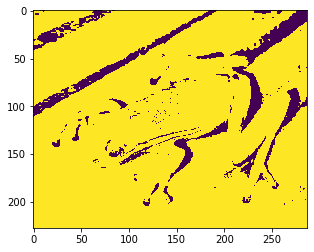

In [4]:
%matplotlib inline
import matplotlib.pylab as plt
import imageio
from skimage import color

from see import Segmentors

img = imageio.imread('Image_data/CO-SKEL_v1.1/images/frog/0007.jpg')
gmask = imageio.imread('Image_data/CO-SKEL_v1.1/GT_masks/frog/0007.png')

params = ['CT', 7563, 0.13, 2060, 0.01, 4342, 850, 10, 0.57, 1863, 1543, 1, 3, 1, 0.35, (1, 1), 8.1, 'checkerboard', 'checkerboard', 3, 7625, -35, 0.0, 0.0, 0.0]

seg = Segmentors.algoFromParams(params)
mask = seg.evaluate(img)
plt.imshow(mask)


fitness = Segmentors.FitnessFunction(mask,gmask)
print(f"fitness[0]")




This is occurring because both regions are mapping to the background. Although not a good solution it should not be discounted as it may lead to a better solution.

We need to find an update to the fitness function that takes this case into consideration.